In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
customers = pd.read_csv('/content/gdrive/My Drive/Projects/Data Mining/H&M Fashion/customers.csv')
customers = customers[['customer_id','age','fashion_news_frequency','club_member_status']]
customers.head()

,customer_id,age,fashion_news_frequency,club_member_status
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0,NONE,ACTIVE
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0,NONE,ACTIVE
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0,NONE,ACTIVE
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0,NONE,ACTIVE
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0,Regularly,ACTIVE


In [ ]:
transactions = pd.read_csv('/content/gdrive/My Drive/Projects/Data Mining/H&M Fashion/transactions_train.csv')
transactions.tail()

,t_dat,customer_id,article_id,price,sales_channel_id
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1
31788323,2020-09-22,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,898573003,0.033881,2


In [ ]:
transactions['year'] = pd.DatetimeIndex(transactions['t_dat']).year
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,year
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018


In [ ]:
transactions['month'] = pd.DatetimeIndex(transactions['t_dat']).month

In [ ]:
transactions_per_year = transactions[['year','customer_id']].value_counts().reset_index()

In [ ]:
transactions_per_year.columns=['year', 'customer_id', 'num_of_purchase']
transactions_per_year

,year,customer_id,num_of_purchase
0,2019,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,959
1,2019,b14bfba3ae0da5af6e9711059773acf713cd7bb9a2c940...,865
2,2020,b637a3e7d8b0caa947aaefd609b8d84a9ee962cf0a52a5...,790
3,2020,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,738
4,2019,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,738
...,...,...,...
2420706,2019,5ed53c640dce39c16c0f1f64ac2ef74aef4446b25f693e...,1
2420707,2019,c95b23549f88cfbd7c073901985dab327aa0c3910791db...,1
2420708,2020,a0334cb99c08d88028a9254319d77a9b8a4c3b45206937...,1
2420709,2018,40252ad9a762499cefe3c6b067e857021de4e3a72ed3c4...,1


In [ ]:
freq_trans=transactions_per_year[(transactions_per_year['num_of_purchase']>29)&(transactions_per_year['year']==2020)]

In [ ]:
freq_trans_info = transactions[transactions['customer_id'].isin(freq_trans['customer_id'])]

In [ ]:
ran_freq_trans_info = freq_trans_info.sample(n=40000)
ran_freq_trans_info

,t_dat,customer_id,article_id,price,sales_channel_id,year,month
18674857,2019-11-05,192cd578dfe82588be26ce6892891eea2299ddb660b288...,794007001,0.050831,2,2019,11
18617822,2019-11-03,af7df16e251b561f42c857f27d3ce722f06f2cbf114b9c...,536139047,0.013542,2,2019,11
27960285,2020-06-24,c59592b5f06d6dc2083e39953bef13c225cbab73de91bd...,878509001,0.030492,2,2020,6
30063652,2020-08-07,8e717b08d55f50fd18f2ecd012500ec7f1b40ef1b0b3fe...,808628002,0.033881,2,2020,8
21548202,2020-01-23,15ffa572fb5669c56858208f5dd53e88ad5a39fcbd2a5e...,816832003,0.025407,1,2020,1
...,...,...,...,...,...,...,...
2014205,2018-11-01,8981008bfa429b14872e092e2f68f264e2bff348d8a520...,663015003,0.050831,2,2018,11
25055416,2020-04-25,8f73c54937ab78cca58cafa3ae19dfe53f23ce892a7abb...,798407010,0.007339,2,2020,4
14422950,2019-07-24,8a07b0d05dbcbe8057b2037f4b5378951a323db5c44ab4...,733106001,0.017610,2,2019,7
31710473,2020-09-20,962a94148a9c398ef881bad43c7a8ffcf676c867b4afd5...,777018001,0.027102,2,2020,9


In [ ]:
freq_customers=customers[customers['customer_id'].isin(freq_trans['customer_id'])]
freq_customers

,customer_id,age,fashion_news_frequency,club_member_status
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0,NONE,ACTIVE
13,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,56.0,Regularly,ACTIVE
21,0000f1c71aafe5963c3d195cf273f7bfd50bbf17761c91...,30.0,Regularly,ACTIVE
26,0001177027259b455f979d85a278e4b280205d4de5cce4...,31.0,Regularly,ACTIVE
38,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,44.0,Regularly,ACTIVE
...,...,...,...,...
1371879,fffae8eb3a282d8c43c77dd2ca0621703b71e90904dfde...,25.0,NONE,ACTIVE
1371921,fffcc686584b3388a3afe410e3555e3557f556382b2f60...,41.0,NONE,ACTIVE
1371949,fffe7116f9f68e8ad287fd7b6e33aad4871d7080e77d2d...,55.0,Regularly,ACTIVE
1371960,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,29.0,Regularly,ACTIVE


In [ ]:
freq_customers.loc[freq_customers['fashion_news_frequency']=='NONE','fashion_news_frequency'] = float(0.0)
freq_customers.loc[freq_customers['fashion_news_frequency']=='Regularly','fashion_news_frequency'] = float(0.5)
freq_customers.loc[freq_customers['fashion_news_frequency']=='Monthly','fashion_news_frequency'] = float(1.0)

freq_customers.loc[freq_customers['club_member_status']=='PRE-CREATE','club_member_status'] = float(0.5)
freq_customers.loc[freq_customers['club_member_status']=='LEFT CLUB','club_member_status'] = float(0.0)
freq_customers.loc[freq_customers['club_member_status']=='ACTIVE','club_member_status'] = float(1.0)

In [ ]:
articles = pd.read_csv('/content/gdrive/My Drive/Projects/Data Mining/H&M Fashion/articles.csv')
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
articles = articles[['article_id','product_code','product_type_no','colour_group_code','section_no','garment_group_no']]

In [ ]:
articles['article_id'] = articles.article_id.astype('int32')

In [ ]:
freq_info = ran_freq_trans_info.merge(freq_customers,on='customer_id').merge(articles,on='article_id')
freq_info.head()

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,age,fashion_news_frequency,club_member_status,product_code,product_type_no,colour_group_code,section_no,garment_group_no
0,2019-11-05,192cd578dfe82588be26ce6892891eea2299ddb660b288...,794007001,0.050831,2,2019,11,59.0,0.0,1.0,794007,272,9,15,1009
1,2019-12-18,d0a7ec8573cd3506d5ac907211a6da34b9b6e7fd394b9f...,794007001,0.024695,2,2019,12,26.0,0.5,1.0,794007,272,9,15,1009
2,2019-12-02,d298d976e6ee960d093dc3fc0c8ed45ecc173635cfcac2...,794007001,0.030492,2,2019,12,26.0,0.0,1.0,794007,272,9,15,1009
3,2020-01-09,fee71d4b4561b7266707133c1b0aad70c0e468f386673c...,794007001,0.033881,2,2020,1,74.0,0.0,1.0,794007,272,9,15,1009
4,2020-05-28,18df4ae049196d8a5a3c75ead2610b18c743c6bacea3b2...,794007001,0.032017,2,2020,5,30.0,0.5,1.0,794007,272,9,15,1009


In [ ]:
freq_info_r = freq_trans_info.merge(freq_customers,on='customer_id').merge(articles,on='article_id')
freq_info_r

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,age,fashion_news_frequency,club_member_status,product_code,product_type_no,colour_group_code,section_no,garment_group_no
0,2018-09-20,003ac6eff3ca20cbe4e14a106a5e28b7551616005de8f9...,617322003,0.033881,1,2018,9,27.0,0.5,1.0,617322,258,9,2,1005
1,2018-09-20,003ac6eff3ca20cbe4e14a106a5e28b7551616005de8f9...,617322003,0.018627,1,2018,9,27.0,0.5,1.0,617322,258,9,2,1005
2,2019-07-06,03688ec91eaf4d8569ec00a450567f829e122b7a368ce6...,617322003,0.014322,1,2019,7,47.0,0.5,1.0,617322,258,9,2,1005
3,2018-11-03,046d18ede21914c134c22206bda0e043526e24e5e54a29...,617322003,0.033881,2,2018,11,29.0,0.0,1.0,617322,258,9,2,1005
4,2018-09-20,0c4c518e5d1eaf3fc39f93463c2406ad8b659d6c22c910...,617322003,0.033881,2,2018,9,52.0,0.5,1.0,617322,258,9,2,1005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641068,2020-08-02,8ed33a7923f599bf21e5e4c0df5c1d712ec42eccb0bb12...,876193002,0.016932,2,2020,8,38.0,0.5,1.0,876193,91,51,42,1020
10641069,2020-09-06,8ed33a7923f599bf21e5e4c0df5c1d712ec42eccb0bb12...,761822001,0.083034,2,2020,9,38.0,0.5,1.0,761822,262,73,45,1007
10641070,2020-09-06,8ed33a7923f599bf21e5e4c0df5c1d712ec42eccb0bb12...,849231002,0.022017,2,2020,9,38.0,0.5,1.0,849231,75,52,45,1019
10641071,2020-09-22,6ebc5f2290993f1d4cb76b647f6f2674de9bb37e452193...,923397001,0.016932,1,2020,9,NaN,0.0,1.0,923397,67,9,52,1019


In [ ]:
freq_info['fashion_news_frequency'].value_counts()

0.0    20369
0.5    19612
Name: fashion_news_frequency, dtype: int64

In [ ]:
freq_info['club_member_status'].value_counts()

1.0    39828
0.5      104
0.0        7
Name: club_member_status, dtype: int64

In [ ]:
freq_info=freq_info.dropna()
freq_info

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,age,fashion_news_frequency,club_member_status,product_code,product_type_no,colour_group_code,section_no,garment_group_no
0,2019-11-05,192cd578dfe82588be26ce6892891eea2299ddb660b288...,794007001,0.050831,2,2019,11,59.0,0.0,1.0,794007,272,9,15,1009
1,2019-12-18,d0a7ec8573cd3506d5ac907211a6da34b9b6e7fd394b9f...,794007001,0.024695,2,2019,12,26.0,0.5,1.0,794007,272,9,15,1009
2,2019-12-02,d298d976e6ee960d093dc3fc0c8ed45ecc173635cfcac2...,794007001,0.030492,2,2019,12,26.0,0.0,1.0,794007,272,9,15,1009
3,2020-01-09,fee71d4b4561b7266707133c1b0aad70c0e468f386673c...,794007001,0.033881,2,2020,1,74.0,0.0,1.0,794007,272,9,15,1009
4,2020-05-28,18df4ae049196d8a5a3c75ead2610b18c743c6bacea3b2...,794007001,0.032017,2,2020,5,30.0,0.5,1.0,794007,272,9,15,1009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2020-05-14,874e2e6db6c92d2beb35ef8657370d8000ae51b6a76e8e...,910278001,0.025169,2,2020,5,39.0,0.0,1.0,910278,258,10,15,1010
39996,2019-11-03,c708f7d133156eb49119845aba6233302d8bb39e15d814...,787696007,0.027102,2,2019,11,51.0,0.5,1.0,787696,265,9,15,1013
39997,2019-06-14,c7fb58033344e37f67da34b730d01fbd963e31c8c192a1...,745219003,0.022017,2,2019,6,52.0,0.0,1.0,745219,253,9,53,1010
39998,2020-03-16,d352a0b4121b26c818595b6cb1914aa7e068f66e0e7e35...,816353001,0.030492,2,2020,3,30.0,0.0,1.0,816353,256,12,18,1005


In [ ]:
freq_info.loc[freq_info['fashion_news_frequency']=='NONE','fashion_news_frequency'] = float(0.0)
freq_info.loc[freq_info['fashion_news_frequency']=='Regularly','fashion_news_frequency'] = float(0.5)
freq_info.loc[freq_info['fashion_news_frequency']=='Monthly','fashion_news_frequency'] = float(1.0)
freq_info

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,age,fashion_news_frequency,club_member_status,product_code,product_type_no,colour_group_code,section_no,garment_group_no
0,2019-11-05,192cd578dfe82588be26ce6892891eea2299ddb660b288...,794007001,0.050831,2,2019,11,59.0,0.0,1.0,794007,272,9,15,1009
1,2019-12-18,d0a7ec8573cd3506d5ac907211a6da34b9b6e7fd394b9f...,794007001,0.024695,2,2019,12,26.0,0.5,1.0,794007,272,9,15,1009
2,2019-12-02,d298d976e6ee960d093dc3fc0c8ed45ecc173635cfcac2...,794007001,0.030492,2,2019,12,26.0,0.0,1.0,794007,272,9,15,1009
3,2020-01-09,fee71d4b4561b7266707133c1b0aad70c0e468f386673c...,794007001,0.033881,2,2020,1,74.0,0.0,1.0,794007,272,9,15,1009
4,2020-05-28,18df4ae049196d8a5a3c75ead2610b18c743c6bacea3b2...,794007001,0.032017,2,2020,5,30.0,0.5,1.0,794007,272,9,15,1009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2020-05-14,874e2e6db6c92d2beb35ef8657370d8000ae51b6a76e8e...,910278001,0.025169,2,2020,5,39.0,0.0,1.0,910278,258,10,15,1010
39996,2019-11-03,c708f7d133156eb49119845aba6233302d8bb39e15d814...,787696007,0.027102,2,2019,11,51.0,0.5,1.0,787696,265,9,15,1013
39997,2019-06-14,c7fb58033344e37f67da34b730d01fbd963e31c8c192a1...,745219003,0.022017,2,2019,6,52.0,0.0,1.0,745219,253,9,53,1010
39998,2020-03-16,d352a0b4121b26c818595b6cb1914aa7e068f66e0e7e35...,816353001,0.030492,2,2020,3,30.0,0.0,1.0,816353,256,12,18,1005


In [ ]:
freq_info.loc[freq_info['club_member_status']=='PRE-CREATE','club_member_status'] = float(0.5)
freq_info.loc[freq_info['club_member_status']=='LEFT CLUB','club_member_status'] = float(0.0)
freq_info.loc[freq_info['club_member_status']=='ACTIVE','club_member_status'] = float(1.0)
freq_info

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,age,fashion_news_frequency,club_member_status,product_code,product_type_no,colour_group_code,section_no,garment_group_no
0,2019-11-05,192cd578dfe82588be26ce6892891eea2299ddb660b288...,794007001,0.050831,2,2019,11,59.0,0.0,1.0,794007,272,9,15,1009
1,2019-12-18,d0a7ec8573cd3506d5ac907211a6da34b9b6e7fd394b9f...,794007001,0.024695,2,2019,12,26.0,0.5,1.0,794007,272,9,15,1009
2,2019-12-02,d298d976e6ee960d093dc3fc0c8ed45ecc173635cfcac2...,794007001,0.030492,2,2019,12,26.0,0.0,1.0,794007,272,9,15,1009
3,2020-01-09,fee71d4b4561b7266707133c1b0aad70c0e468f386673c...,794007001,0.033881,2,2020,1,74.0,0.0,1.0,794007,272,9,15,1009
4,2020-05-28,18df4ae049196d8a5a3c75ead2610b18c743c6bacea3b2...,794007001,0.032017,2,2020,5,30.0,0.5,1.0,794007,272,9,15,1009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2020-05-14,874e2e6db6c92d2beb35ef8657370d8000ae51b6a76e8e...,910278001,0.025169,2,2020,5,39.0,0.0,1.0,910278,258,10,15,1010
39996,2019-11-03,c708f7d133156eb49119845aba6233302d8bb39e15d814...,787696007,0.027102,2,2019,11,51.0,0.5,1.0,787696,265,9,15,1013
39997,2019-06-14,c7fb58033344e37f67da34b730d01fbd963e31c8c192a1...,745219003,0.022017,2,2019,6,52.0,0.0,1.0,745219,253,9,53,1010
39998,2020-03-16,d352a0b4121b26c818595b6cb1914aa7e068f66e0e7e35...,816353001,0.030492,2,2020,3,30.0,0.0,1.0,816353,256,12,18,1005


In [ ]:
freq_info['fashion_news_frequency'] = freq_info['fashion_news_frequency'].astype('float64')
freq_info['club_member_status'] = freq_info['club_member_status'].astype('float64')

In [ ]:
freq_info_r['fashion_news_frequency'] = freq_info_r['fashion_news_frequency'].astype('float64')
freq_info_r['club_member_status'] = freq_info_r['club_member_status'].astype('float64')

In [ ]:
freq_info.head()

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,age,fashion_news_frequency,club_member_status,product_code,product_type_no,colour_group_code,section_no,garment_group_no
0,2019-11-05,192cd578dfe82588be26ce6892891eea2299ddb660b288...,794007001,0.050831,2,2019,11,59.0,0.0,1.0,794007,272,9,15,1009
1,2019-12-18,d0a7ec8573cd3506d5ac907211a6da34b9b6e7fd394b9f...,794007001,0.024695,2,2019,12,26.0,0.5,1.0,794007,272,9,15,1009
2,2019-12-02,d298d976e6ee960d093dc3fc0c8ed45ecc173635cfcac2...,794007001,0.030492,2,2019,12,26.0,0.0,1.0,794007,272,9,15,1009
3,2020-01-09,fee71d4b4561b7266707133c1b0aad70c0e468f386673c...,794007001,0.033881,2,2020,1,74.0,0.0,1.0,794007,272,9,15,1009
4,2020-05-28,18df4ae049196d8a5a3c75ead2610b18c743c6bacea3b2...,794007001,0.032017,2,2020,5,30.0,0.5,1.0,794007,272,9,15,1009


In [ ]:
freq_info['colour_group_code_scale'] = (freq_info['colour_group_code']-freq_info['colour_group_code'].min())/(freq_info['colour_group_code'].max()-freq_info['colour_group_code'].min())
freq_info['garment_group_no_scale'] = (freq_info['garment_group_no']-freq_info['garment_group_no'].min())/(freq_info['garment_group_no'].max()-freq_info['garment_group_no'].min())
freq_info['product_type_no_scale'] = (freq_info['product_type_no']-freq_info['product_type_no'].min())/(freq_info['product_type_no'].max()-freq_info['product_type_no'].min())
freq_info['month_scale'] = (freq_info['month']-freq_info['month'].min())/(freq_info['month'].max()-freq_info['month'].min())
freq_info['age_scale'] = (freq_info['age']-freq_info['age'].min())/(freq_info['age'].max()-freq_info['age'].min())
freq_info.head()

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,age,fashion_news_frequency,club_member_status,product_code,product_type_no,colour_group_code,section_no,garment_group_no,colour_group_code_scale,garment_group_no_scale,product_type_no_scale,month_scale,age_scale
0,2019-11-05,192cd578dfe82588be26ce6892891eea2299ddb660b288...,794007001,0.050831,2,2019,11,59.0,0.0,1.0,794007,272,9,15,1009,0.106383,0.333333,0.357798,0.909091,0.573333
1,2019-12-18,d0a7ec8573cd3506d5ac907211a6da34b9b6e7fd394b9f...,794007001,0.024695,2,2019,12,26.0,0.5,1.0,794007,272,9,15,1009,0.106383,0.333333,0.357798,1.000000,0.133333
2,2019-12-02,d298d976e6ee960d093dc3fc0c8ed45ecc173635cfcac2...,794007001,0.030492,2,2019,12,26.0,0.0,1.0,794007,272,9,15,1009,0.106383,0.333333,0.357798,1.000000,0.133333
3,2020-01-09,fee71d4b4561b7266707133c1b0aad70c0e468f386673c...,794007001,0.033881,2,2020,1,74.0,0.0,1.0,794007,272,9,15,1009,0.106383,0.333333,0.357798,0.000000,0.773333
4,2020-05-28,18df4ae049196d8a5a3c75ead2610b18c743c6bacea3b2...,794007001,0.032017,2,2020,5,30.0,0.5,1.0,794007,272,9,15,1009,0.106383,0.333333,0.357798,0.363636,0.186667


In [ ]:
freq_info_r['colour_group_code_scale'] = (freq_info_r['colour_group_code']-freq_info_r['colour_group_code'].min())/(freq_info_r['colour_group_code'].max()-freq_info_r['colour_group_code'].min())
freq_info_r['garment_group_no_scale'] = (freq_info_r['garment_group_no']-freq_info_r['garment_group_no'].min())/(freq_info_r['garment_group_no'].max()-freq_info_r['garment_group_no'].min())
freq_info_r['product_type_no_scale'] = (freq_info_r['product_type_no']-freq_info_r['product_type_no'].min())/(freq_info_r['product_type_no'].max()-freq_info_r['product_type_no'].min())
freq_info_r['month_scale'] = (freq_info_r['month']-freq_info_r['month'].min())/(freq_info_r['month'].max()-freq_info_r['month'].min())
freq_info_r['age_scale'] = (freq_info_r['age']-freq_info_r['age'].min())/(freq_info_r['age'].max()-freq_info_r['age'].min())
freq_info_r.head()

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,age,fashion_news_frequency,club_member_status,product_code,product_type_no,colour_group_code,section_no,garment_group_no,colour_group_code_scale,garment_group_no_scale,product_type_no_scale,month_scale,age_scale
0,2018-09-20,003ac6eff3ca20cbe4e14a106a5e28b7551616005de8f9...,617322003,0.033881,1,2018,9,27.0,0.5,1.0,617322,258,9,2,1005,0.106383,0.166667,0.33945,0.727273,0.141026
1,2018-09-20,003ac6eff3ca20cbe4e14a106a5e28b7551616005de8f9...,617322003,0.018627,1,2018,9,27.0,0.5,1.0,617322,258,9,2,1005,0.106383,0.166667,0.33945,0.727273,0.141026
2,2019-07-06,03688ec91eaf4d8569ec00a450567f829e122b7a368ce6...,617322003,0.014322,1,2019,7,47.0,0.5,1.0,617322,258,9,2,1005,0.106383,0.166667,0.33945,0.545455,0.397436
3,2018-11-03,046d18ede21914c134c22206bda0e043526e24e5e54a29...,617322003,0.033881,2,2018,11,29.0,0.0,1.0,617322,258,9,2,1005,0.106383,0.166667,0.33945,0.909091,0.166667
4,2018-09-20,0c4c518e5d1eaf3fc39f93463c2406ad8b659d6c22c910...,617322003,0.033881,2,2018,9,52.0,0.5,1.0,617322,258,9,2,1005,0.106383,0.166667,0.33945,0.727273,0.461538


In [ ]:
freq_info_r_model = freq_info_r[['age_scale','colour_group_code_scale','garment_group_no_scale','fashion_news_frequency','product_type_no_scale','month_scale','club_member_status']]
freq_info_r=freq_info_r.dropna()

In [ ]:
X = freq_info[['age_scale','colour_group_code_scale','garment_group_no_scale','fashion_news_frequency','product_type_no_scale','month_scale','club_member_status']]
y = freq_info['article_id']

In [ ]:
X.to_csv("/content/gdrive/My Drive/Projects/Data Mining/H&M Fashion/X.csv", index=False)

In [ ]:
y.to_csv("/content/gdrive/My Drive/Projects/Data Mining/H&M Fashion/y.csv", index=False)

In [ ]:
freq_info_r_model.to_csv("/content/gdrive/My Drive/Projects/Data Mining/H&M Fashion/freq_info_r_model.csv", index=False)

In [4]:
X = pd.read_csv("/content/gdrive/My Drive/Projects/Data Mining/H&M Fashion/X.csv")
y = pd.read_csv("/content/gdrive/My Drive/Projects/Data Mining/H&M Fashion/y.csv")
freq_info_r_model = pd.read_csv("/content/gdrive/My Drive/Projects/Data Mining/H&M Fashion/freq_info_r_model.csv")

In [19]:
X = np.array(X)
y = np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [24]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(27902, 1, 7) (27902, 1) (11958, 1, 7) (11958, 1)


In [28]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from datetime import date
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, neighbors
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

model = Sequential()
model.add(LSTM(
    100,
    input_shape = (X_train.shape[1], X_train.shape[2]),
    return_sequences=True
))
model.add(Dropout(0.2))
model.add(LSTM(100, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=50, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
559/559 - 6s - loss: 529385608636792832.0000 - val_loss: 529610493124411392.0000 - 6s/epoch - 12ms/step
Epoch 2/50
559/559 - 3s - loss: 529385333758885888.0000 - val_loss: 529610390045196288.0000 - 3s/epoch - 5ms/step
Epoch 3/50
559/559 - 3s - loss: 529385574277054464.0000 - val_loss: 529610390045196288.0000 - 3s/epoch - 5ms/step
Epoch 4/50
559/559 - 3s - loss: 529385574277054464.0000 - val_loss: 529610355685457920.0000 - 3s/epoch - 5ms/step
Epoch 5/50
559/559 - 3s - loss: 529384990161502208.0000 - val_loss: 529610252606242816.0000 - 3s/epoch - 5ms/step
Epoch 6/50
559/559 - 3s - loss: 529385230679670784.0000 - val_loss: 529610252606242816.0000 - 3s/epoch - 5ms/step
Epoch 7/50
559/559 - 3s - loss: 529384921442025472.0000 - val_loss: 529610218246504448.0000 - 3s/epoch - 5ms/step
Epoch 8/50
559/559 - 3s - loss: 529385196319932416.0000 - val_loss: 529610218246504448.0000 - 3s/epoch - 5ms/step
Epoch 9/50
559/559 - 3s - loss: 529385058880978944.0000 - val_loss: 529610218246504448.

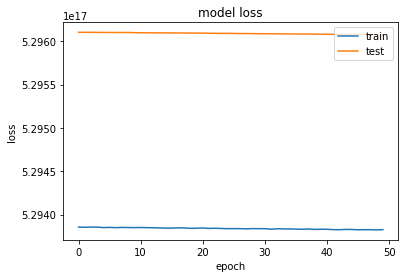

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error

# make a prediction
yhat = model.predict(X_test)
test_X = X_test.reshape((X_test.shape[0], 7))
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

374/374 [==============================] - 2s 2ms/step
Test RMSE: 727741538.561
